# Overview

This notebook implements several simulations of neuronal models, including:
- **Single Cell Model**: A model simulating the activity of a single neuron using the AdEx model.
- **Network Simulations**: Simulates a network of neurons using a combination of different cell types (RS, FS).
- **Mean Field Model**: A simplified model for large-scale brain network simulations.
- **Whole Brain Model**: A simulation of brain activity using The Virtual Brain (TVB) framework.
- **PCI, BOLD, and FC**: Analysis related to the PCI (possibly 'Principal Component Index'), BOLD signals, and Functional Connectivity (FC).
- **Dynamical Analysis**: Analysis of the dynamics of the model's evolution over time.


In [8]:
%precision 2
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
%run setup.py

Everything is now installed. You can proceed. 


In this implementation, we simulate a single neuron using the **AdEx model** (Adaptive Exponential Integrate-and-Fire).
The model equations are defined as follows:


$c_{m}  \frac{dv}{dt}  =  g_L(E_L-v)+ g_L\Delta e^{\frac{v-v_{thr}}{\Delta }} -W + I_{syn}$  

$\frac{dW}{dt}  =  -\frac{1}{\tau_w} (a(v-E_L) - W) + b \sum_{t_{sp}}\delta(t-t_{sp})$

These equations are used in the `eqs` variable of the Brian framework, which implements spiking neuron models.

You can select a different model and adjust the `eqs` and the relevant parameters of the model accordingly.

In [2]:
#These are the arguments and default values - to try different parameters refer to the script
%run single_cell_sim.py --help

usage: single_cell_sim.py [-h] [--type TYPE] [--kwargs KWARGS] [--iext IEXT]
                          [--time TIME]

options:
  -h, --help       show this help message and exit
  --type TYPE      type of cell (RS or FS) (default: RS)
  --kwargs KWARGS  String representation of kwargs - change the first argument
                   to "use": True before adding your kwargs, e.g: "{"use":
                   True, "b": 60}" (default: {"use": False})
  --iext IEXT      input current (nA) (default: 0.3)
  --time TIME      Total Time of simulation (ms) (default: 200)


cell parameters --NOT-- in SI units
{'use': True, 'b': 85}


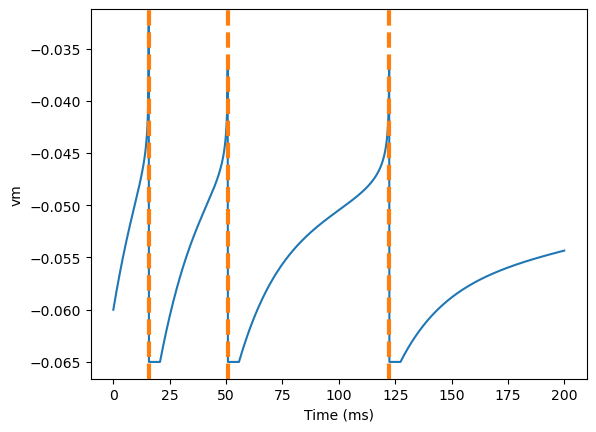

In [29]:
# run RS cell with adaptation b=85 pA
%run single_cell_sim.py --cell RS --kwargs use=True b=85

<a id="network-simulations"></a>
### Network Simulations

Here, you simulate a network of neurons. You can specify multiple parameters for the simulation.

In [26]:
#These are the arguments and default values - for more changes go to the script
%run adex_simulation_network.py --help

usage: adex_simulation_network.py [-h] [--cells CELLS] [--iext IEXT]
                                  [--input INPUT] [--plat_dur PLAT_DUR]
                                  [--time TIME] [--save_path SAVE_PATH]
                                  [--save_mean SAVE_MEAN]
                                  [--save_all SAVE_ALL] [--kwargs KWARGS]

optional arguments:
  -h, --help            show this help message and exit
  --cells CELLS         cell types of the populations - do not pass single
                        cells (default: FS-RS)
  --iext IEXT           external input (Hz) (default: 0.5)
  --input INPUT         Stable input amplitude (Hz) (default: 0)
  --plat_dur PLAT_DUR   If 0 the input will be applied for the whole duration
                        of the simulation (default: 0)
  --time TIME           Total Time of simulation (ms) (default: 1000)
  --save_path SAVE_PATH
                        save path (default: None)
  --save_mean SAVE_MEAN
                        save me

Network Simulations
This script runs a network of cells (RS and FS cell types). It allows you to specify various parameters like:
- external input (iext)
- time duration of the simulation
- external input characteristics
- saving options for the simulation results

WARNING    c:\Users\maria\anaconda3\Lib\site-packages\tvb\datatypes\surfaces.py:60: UserWarning: Geodesic distance module is unavailable; some functionality for surfaces will be unavailable.
  warnings.warn(msg)
 [py.warnings]


2024-12-24 19:11:50,013 - WARNING - py.warnings - c:\Users\maria\anaconda3\Lib\site-packages\tvb\datatypes\surfaces.py:60: UserWarning: Geodesic distance module is unavailable; some functionality for surfaces will be unavailable.
  warnings.warn(msg)



WARNING    c:\Users\maria\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
 [py.warnings]


2024-12-24 19:11:52,762 - WARNING - py.warnings - c:\Users\maria\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (

cell parameters --NOT-- in SI units
b_e=  75


WARNING    Cannot use Cython, a test compilation failed: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/ (DistutilsPlatformError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]


--##Start simulation##--
--##End simulation##--


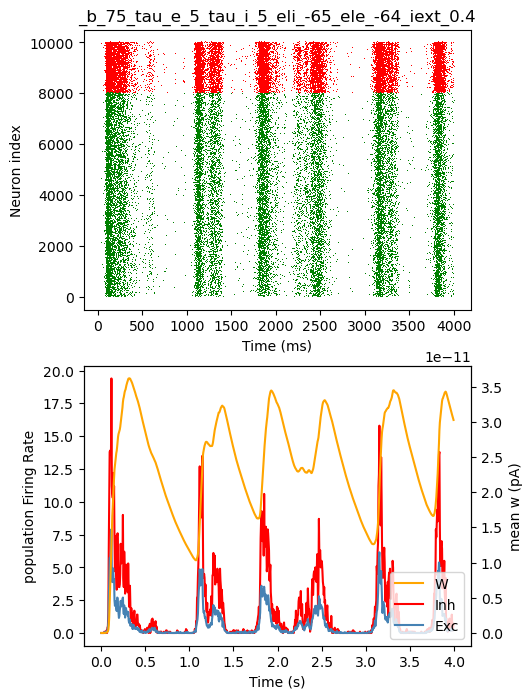

 done


In [1]:
# Running the simulation with specific parameters:
# 'b_e' is the adaptation strength of the excitatory population
# Each key (e.g., 'FS-RS', 'FS-RS_10' etc.) corresponds to a predefined dictionary of configuration values (refer to ./Tf_calc/cell_library.py)
# that determine the properties of the modeled neurons, including cellular, synaptic, and network characteristics.


%run adex_simulation_network.py --time 4000  --iext 0.4 --cells FS-RS_10 --kwargs use=True b_e=75

<a id="mean-field-model"></a>
### Mean Field Model

In [ ]:
dkwargs = 'use=True b_e=0' # 'use=True' to specify additional parameters of the model, here adaptation b_e=0 pA  
time = 4 # duration of simulation in seconds
iext = 0.315 # mean of the external noise modelled as an Ornstein-Uhlenbeck (OU) process, in Hz

file_fs = "./Tf_calc/data/FS-cell_CONFIG1_fit.npy" # file with fitting parameters (P) for fast spiking cell
file_rs = "./Tf_calc/data/RS-cell0_CONFIG1_fit.npy" # file with fitting parameters (P) for regular spiking cell

command = f"MF_script_with_OS.py --kwargs {dkwargs} --time {time} --file_fs {file_fs} --file_rs {file_rs} --iext {iext}"

%run $command


WARNING    c:\Users\maria\anaconda3\Lib\site-packages\tvb\datatypes\surfaces.py:60: UserWarning: Geodesic distance module is unavailable; some functionality for surfaces will be unavailable.
  warnings.warn(msg)
 [py.warnings]


2024-12-22 17:22:58,124 - WARNING - py.warnings - c:\Users\maria\anaconda3\Lib\site-packages\tvb\datatypes\surfaces.py:60: UserWarning: Geodesic distance module is unavailable; some functionality for surfaces will be unavailable.
  warnings.warn(msg)



WARNING    c:\Users\maria\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
 [py.warnings]


2024-12-22 17:23:00,919 - WARNING - py.warnings - c:\Users\maria\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (

usage: MF_script_with_OS.py [-h] [--cells CELLS] [--iext IEXT] [--input INPUT]
                            [--plat_dur PLAT_DUR] [--T T] --kwargs
                            [KWARGS ...] [--time TIME] [--file_fs FILE_FS]
                            [--file_rs FILE_RS]

options:
  -h, --help            show this help message and exit
  --cells CELLS         cell types of the populations (default: FS-RS)
  --iext IEXT           external input - in Hz (default: 0.3)
  --input INPUT         Stable input amplitude (Hz) (default: 0)
  --plat_dur PLAT_DUR   If 0 the input will be applied for the whole duration
                        of the simulation (default: 0)
  --T T                 time constant - in ms (default: 20.0)
  --kwar

<a id="whole-brain-model"></a>
### Whole Brain Model

The whole-brain model uses The Virtual Brain (TVB) framework to simulate activity across brain regions.

#### Choose a connectome 

The simulation can be run using different brain connectivity matrices or connectomes. 

Connectivity matrices can either be obtained from TVB, loaded from files, or defined manually:

1. Get a default connectivity from TVB software

    - `parameters.parameter_connection_between_region['default'] = True`

2. Point to a zip folder (required files included in the zip folder: centres, tract_lengths, weights)

    - `parameters.parameter_connection_between_region['from_file'] = True`
    - `parameters.parameter_connection_between_region['path'] = path/to/zip/file`
    - `parameters.parameter_connection_between_region['conn_name'] = 'Connectivity.zip'` (add the actual zip name)

3. Point to an h5 file

    - `parameters.parameter_connection_between_region['path'] = path/to/h5/file CHECK`

4. Point to an unzipped folder that contains necessarily tract_lengths.txt and weights.txt (optional: region_labels, centres, cortical)

    - `parameters.parameter_connection_between_region['path'] = path/to/folder/containing/files`


In [18]:
# For example, setting up the connectome from a file:

# cwd = os.getcwd()
path_conn = os.path.join(os.getcwd(), "TVB/tvb_model_reference/data/connectivity") 
parameters.parameter_connection_between_region['from_file'] = True # get connectivity from a zip file
parameters.parameter_connection_between_region['path'] = path_conn # point to folder containing the .zip file
parameters.parameter_connection_between_region['conn_name'] = 'connectivity_76.zip' # name of the zip file

In [23]:
## First set the parameters of the simulation:
run_sim = 4000.0 # ms, length of the simulation
cut_transient = 2000.0 # ms, time to discard for initial transient behavior

# List of values of adaptation strength and tau_e which will vary the brain state
# the corresponding combinations will be run: 
# eg here one simulation with {b_e = 5 pA, tau_e = 3.75 ms} (NMDA-blocker anesthesia)
# and one for {b_e = 120 pA, tau_e = 5 ms} (NREM sleep)

bvals = [30] # values of adaptation strength, multiple values can be simulated 
tau_es = [3.75] # values of excitatory synaptic decay, multiple values can be simulated 

iext=0.315e-3 # mean of the external noise, in kHz

## Set the parameters of the stimulus (choose stimval = 0 to simulate spontaneous activity)
stimval = 0 #  stimulus strength

In [19]:
simulator = sim_init(parameters)
Nnodes = simulator.number_of_nodes


Here's a refined version of the paragraph:

Here is an example of how to modify `tau_e` and `b_e`:

You can similarly adjust other parameters, such as `tau_i`, by setting them to the desired values. For a list of adjustable parameters, refer to the documentation for the `adjust_parameters` function in `functions.py`.

For instance, to modify `tau_i`, you can pass it as an argument to the run_simulation_all function like this:

run_simulation_all(parameters, b_e=b_e, **tau_i=desired_value_tau_i**, ...)

In [24]:
# Run Simulation

for b_e, tau_e in zip(bvals, tau_es):
    run_simulation_all(parameters, b_e = b_e, tau_e = tau_e,n_nodes=Nnodes,
                       cut_transient=cut_transient, run_sim=run_sim, Iext = iext)
    

Simulation Completed successfully


Loading:  _b_e_30_tau_e_3.75_tau_i_5.0_Iext_0.000315_El_e_-64.0_El_i_-65.0_nseed_10
monitors: 1
Loading:  _b_e_120_tau_e_5_tau_i_5.0_Iext_0.000315_El_e_-64.0_El_i_-65.0_nseed_10
monitors: 1


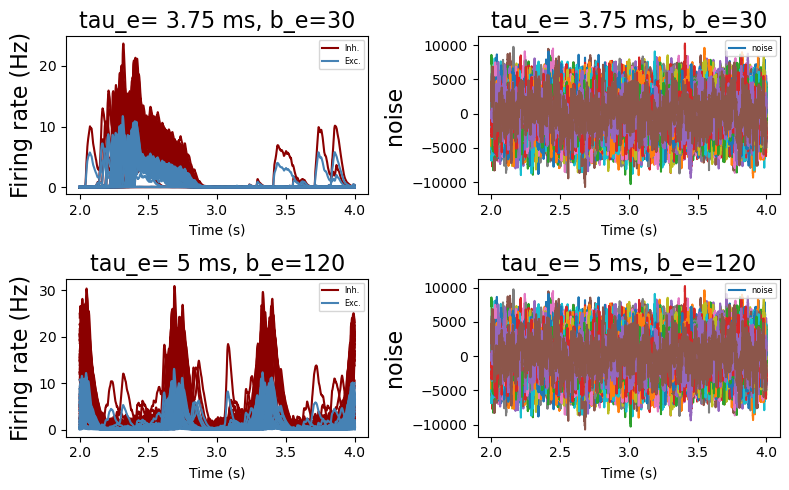

In [25]:
# Parameters to load to the result array 

# Here we load the simulations with  values 
# {b_e = 5 pA, tau_e = 3.75 ms} (NMDA-blocker anesthesia) and {b_e = 120 pA, tau_e = 5 ms} (NREM sleep)

bvals = [30, 120] 
tau_es = [3.75, 5]
iext=0.315e-3

# Monitor to plot (all the monitors) 
monitor = 'Raw'

# State Variables to load:
vars_int = ['E', 'I' ,'noise'] # E: excitatory firing rates (FRs), I : inhibitory FRs 

# Load the results from the simulations
result= []
for i, (b_e, tau_e) in enumerate(zip(bvals, tau_es)): 
    result_param, for_explan = get_result(parameters,cut_transient, run_sim, b_e = b_e, tau_e = tau_e, vars_int = vars_int,Iext = iext)
    result.append(result_param)


#Plot the results from TVB Simulations

params = [list(pair) for pair in zip(bvals, tau_es)]

plot_tvb_results(parameters,params, result, monitor, for_explan, vars_int,cut_transient, run_sim, Iext=iext)

In [65]:
# For explanation of the indexes of the result array, uncomment the following:

access_results(for_explan, bvals, tau_es, change_of='tau_e') # change_of = 'tau_i' in case you are changing tau_i values


Explaining the indices in result:
The result has a length equal to you different parameter combinations, i.e:
result[0]: for b_e = 100 and tau_e= 5

The result[i] is a list of arrays, every element of a list corresponds to a monitor:
Raw monitor : result[i][0]

Each monitor contains an array with the selected variables of interest, for all the time points and nodes
For example for Raw monitor:
For E : result[i][0][0]
For I : result[i][0][1]
For noise : result[i][0][2]

These arrays have shape: time_points x number_of_nodes: (8001, 76)


<a id="pci"></a>
### Evoked Dynamics and PCI

In [ ]:
# Set up the parameters of the simulation
# ---------------------------------------------------------------
run_sim = 4000.0       # Simulation duration in milliseconds
cut_transient = 2000.0 # Discarded initial transient in milliseconds

# Adaptation strength (b_e) and synaptic time constant (tau_e) parameters for varying brain state
bvals = [5]      # List of adaptation strengths
tau_es = [3.75]  # List of synaptic time constants


# Set up the parameters of the stimulus
# ---------------------------------------------------------------
stimval = 1e-3         # Stimulus strength in kHz
t_analysis = 300.0     # Analysis window duration in milliseconds for PCI analysis
stimdur = 50           # Stimulus duration in milliseconds
Nseeds = 2             # Number of random seeds for multiple model realizations

# Calculate randomized onset times for the stimulus
stimtime_allseeds = np.random.rand(Nseeds) * (run_sim - cut_transient - 2 * t_analysis) + t_analysis + cut_transient
stimtime_mean = 2500.0 # Mean time for stimulus onset in milliseconds
stim_region = 5        # Region of stimulation


In [ ]:
## Set the parameters of the stimulus 
stimval = 1e-3 #  stimulus strength in kHz - HERE NO ZERO ANYMORE
t_analysis  = 300. #in ms, for PCI analysis

# Loop over seeds to obtain multi5ple realizations of the model
Nseeds = 2 

# Onset time of the stimulus
stimtime_allseeds = np.random.rand(Nseeds)*(run_sim - cut_transient - 2*t_analysis) + t_analysis + cut_transient # shuffle in ms the start time of stimulus 
stimdur = 50 # ms, duration of the stimulus
stimtime_mean = 2500. # ms, time after simulation start (it will be shufled)
stim_region = 5

In [ ]:
# Iterate over combinations of b_e and tau_e for different brain states

for b_e, tau_e in zip(bvals, tau_es):
    for seed in range(Nseeds):
        run_simulation_all(parameters, b_e = b_e, tau_e = tau_e,n_nodes=Nnodes,stimval = stimval, nseed=seed,
                       cut_transient=cut_transient, run_sim=run_sim)


In [ ]:
# Calculate PCI (Perturbational Complexity Index)

params = [[5, 3.75, 2], [60, 5, 2]] # Each sublist contains [b_e, tau_e, n_seeds]

# Perform PCI calculation for each parameter combination
for b_e, tau_e, n_seeds in params:
    calculate_PCI(parameters, n_seeds, run_sim, cut_transient, stimval=stimval, 
                  b_e=b_e, tau_e=tau_e, n_trials=1)

Loading paper params:
For wake : b_e=5, tau=5.0
For nmda : b_e=30, tau=3.75
For gaba : b_e=30, tau=7.0
For sleep : b_e=120, tau=5.0
Seeds = 60, n_trials=5, stimvals=[1e-05, 0.0001, 0.001]
Creating PCI_all
Creating dataframe


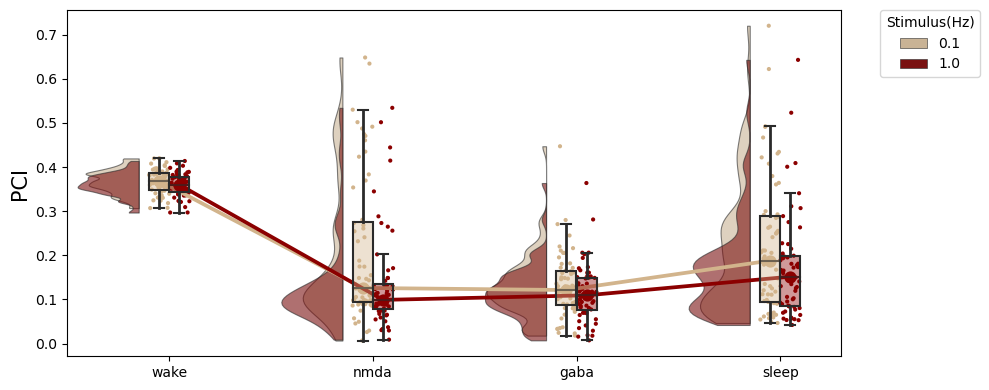

In [28]:
# Plot PCI Results

# Parameters and conditions to plot
params = [[5, 3.75, 2], [60, 5, 2]]  # Each sublist contains [b_e, tau_e, n_seeds]
conditions = ['nmda', 'sleep']      # Labels for the conditions
stimvals = [1e-3]                   # List of stimulus values used
n_trials = 1                        # Number of trials for PCI analysis
pick_stim = [1, 0.1]                # Stimulus strengths to highlight in the plot
local_folder = True                 # Use locally stored results

# Generate and plot raincloud visualization with statistics
plot_raincloud_with_stats(parameters, params, n_trials=n_trials, stimvals=stimvals, 
                          pick_stim=pick_stim, conditions=conditions, local_folder=local_folder)

<a class="anchor" id="bold-and-fc"></a>
### Simulating BOLD signal and Calculating FC-SC Correlation

<a class="anchor" id="bold-and-fc"></a>
### Simulating BOLD signal and Calculating FC-SC Correlation

In [ ]:
# Initialize parameters
parameters.__init__()

In [ ]:
# Configure the connectome

cwd = os.getcwd()
path_conn = os.path.join(cwd, "TVB/tvb_model_reference/data/connectivity")
parameters.parameter_connection_between_region['from_file'] = True
parameters.parameter_connection_between_region['path'] = path_conn
parameters.parameter_connection_between_region['conn_name'] = 'connectivity_76.zip'

In [33]:
# Set the simulation parameters
run_sim = 100000       # Longer simulation for BOLD analysis (ms)
cut_transient = 2000.0 # Transient time (ms)
bvals = [5]
tau_es = [3.75]
stimval = 0            # Set stimulus strength to 0 for spontaneous activity


In [34]:
# Activate BOLD monitor and deactivate unused monitors
parameters.parameter_monitor['Bold'] = True
parameters.parameter_monitor['Raw'] = False
parameters.parameter_monitor['TemporalAverage'] = True
parameters.parameter_monitor['parameter_TemporalAverage']['variables_of_interest'] = [0, 1]

# Specify a folder for saving results to prevent overwriting
additional_path_folder = 'Bold/'

In [ ]:
# Run the simulation

for b_e, tau_e in zip(bvals, tau_es):
    run_simulation_all(parameters, b_e=b_e, tau_e=tau_e, n_nodes=Nnodes, stimval=stimval, 
                       cut_transient=cut_transient, run_sim=run_sim, 
                       additional_path_folder=additional_path_folder)

In [36]:
# Params to load 
bvals = [5]
tau_es = [3.75]

# Parameters to load
vars_int = ['E'] # Variables of interest to analyze
result = []

# Load results for each parameter combination
for i, (b_e, tau_e) in enumerate(zip(bvals, tau_es)):
    result_param, for_explan = get_result(parameters, cut_transient, run_sim, b_e=b_e, 
                                          tau_e=tau_e, vars_int=vars_int, 
                                          additional_path_folder=additional_path_folder)
    result.append(result_param)



# Plot the results

# Select the monitor and variables to plot
monitor = 'Bold'
params = [list(pair) for pair in zip(bvals, tau_es)]

# Plot simulation results
plot_tvb_results(parameters, params, result, monitor, for_explan, vars_int, 
                 cut_transient, run_sim, additional_path_folder=additional_path_folder, 
                 desired_time=10)


Loading:  _b_e_5_tau_e_3.75_tau_i_5.0_Iext_0.000315_El_e_-64.0_El_i_-65.0_nseed_10
monitors: 2


In [37]:
# For explanation of the indexes of the result, uncomment the following:
access_results(for_explan, bvals, tau_es, change_of='tau_e')



Explaining the indices in result:
The result has a length equal to you different parameter combinations, i.e:
result[0]: for b_e = 5 and tau_e= 3.75

The result[i] is a list of arrays, every element of a list corresponds to a monitor:
TemporalAverage monitor : result[i][0]
Bold monitor : result[i][1]

Each monitor contains an array with the selected variables of interest, for all the time points and nodes
For example for TemporalAverage monitor:
For E : result[i][0][0]

These arrays have shape: time_points x number_of_nodes: (97999, 76)


450 76


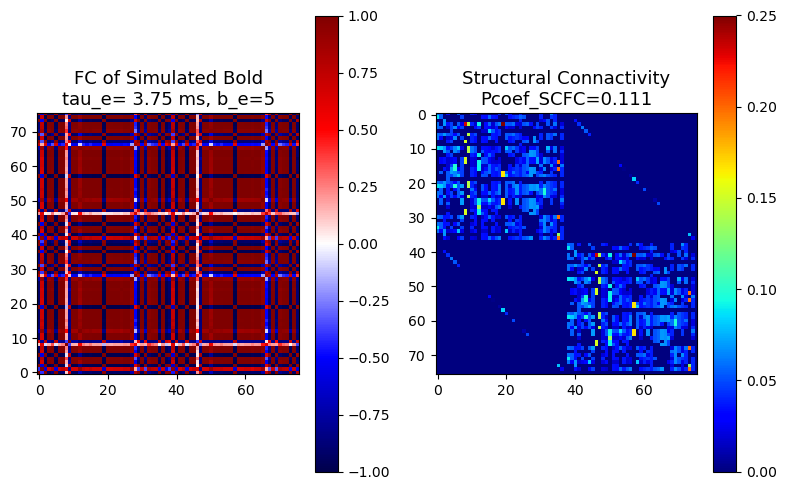

In [97]:
# Add structural connectivity (SC) to the analysis

SC=simulator.connectivity.weights

# Plot functional connectivity (FC) and SC correlation
plot_FC_SC(parameters,params, result, for_explan, cut_transient, run_sim, SC, 
            additional_path_folder=additional_path_folder,desired_time=10)

<a class="anchor" id="dynamical-analysis"></a>
### Dynamical Analysis 

### Network Simulations and Survival Time
**Step 1: Running Network Simulations**
The script `net_sims_dyn_analysis.py` performs network simulations across various parameter combinations of `b_e` (adaptation strength) and `tau_e/tau_i` (excitatory/inhibitory time constants).

Purpose: Simulate network activity to determine survival time for different parameter settings.
Key Parameters:
- `b_e_range`: Range of values for the adaptation strength parameter $b_e$
​
- `tau_e_range`: Range for excitatory time constant $tau_e$
- `tau_i_range`: Range for inhibitory time constant $tau_i$
- `nseeds`: Number of random seeds for variability across simulations.
- `time` : Total simulation time in milliseconds.
- `save_path` : Directory to save simulation results.
- `overwrite` : Whether to overwrite existing results.
- `surv_time_calc`: Enables calculation and saving of survival time for each parameter combination.

In [59]:
#Command to Execute Simulations:

%run net_sims_dyn_analysis.py --b_e_range '0,22,2' --tau_i_range '5, 5.5, 0.2' --nseeds '0,4,2' --surv_time_calc True --save_path './trials/'

usage: net_sims_dyn_analysis.py [-h] [--b_e_range B_E_RANGE]
                                [--tau_e_range TAU_E_RANGE]
                                [--tau_i_range TAU_I_RANGE] [--nseeds NSEEDS]
                                [--time TIME] [--save_path SAVE_PATH]
                                [--overwrite OVERWRITE]
                                [--surv_time_calc SURV_TIME_CALC]

optional arguments:
  -h, --help            show this help message and exit
  --b_e_range B_E_RANGE
                        b_e range of values (default: 0,30,1)
  --tau_e_range TAU_E_RANGE
                        tau_e range of values - if you iterate tau_i then set
                        tau_e_range=np.arange(5.,10.,step=500) (default:
                        5.,7.,10)
  --tau_i_range TAU_I_RANGE
                        tau_i range of values - if you iterate tau_e then set
                        tau_i_range=np.arange(5.,10.,step=500) (default:
                        3.,9.,0.1)
  --nseeds NSEEDS  

**Step 2: Calculating Survival Time Separately**

If simulations are already run, survival times can be computed without re-running the network simulations:

In [55]:
bvals = np.arange(0,22,step=2)  # Adaptation strength values
tauIv = np.arange(5.,5.5,step=0.2)  # Inhibitory time constants
tauEv = np.arange(5.,9.,step=10)  # Excitatory time constants
Nseeds = np.arange(0,4,2)  # Random seeds for variability

# Determine iteration mode based on parameter ranges
if len(tauEv) == 1 and len(tauIv) > 1:
    tau_i_iter = True
    tau_values = tauIv
elif len(tauEv) > 1 and len(tauIv) == 1:
    tau_i_iter = False
    tau_values = tauEv

# Calculate survival times
calculate_survival_time(bvals, tau_values, tau_i_iter, Nseeds, save_path='./trials/')


Done! Saved in : ./trials/


### Mean Field and b_critical Calculation


#### Purpose
The script `calculate_b_crit.py` identifies the critical value of \( b_e \), where the system transitions to a specific dynamical state (e.g., stability or chaos).

#### Key Parameters
Similar to the `net_sims_dyn_analysis.py` script, with the following additional parameters:

- **b_e_range**: Range of \( b_e \) values.
- **tau_e_range**: Range of \( \tau_e \) values.
- **tau_i_range**: Range of \( \tau_i \) values.
- **save_path**: Directory to save the calculated \( b_{critical} \).
- **overwrite**: Overwrite existing results if set to `True`.

In [73]:
%run calculate_b_crit.py --help

usage: calculate_b_crit.py [-h] [--b_e_range B_E_RANGE]
                           [--tau_e_range TAU_E_RANGE]
                           [--tau_i_range TAU_I_RANGE] [--save_path SAVE_PATH]
                           [--overwrite OVERWRITE]

optional arguments:
  -h, --help            show this help message and exit
  --b_e_range B_E_RANGE
                        b_e range of values (default: [ 0 1 2 3 4 5 6 7 8 9 10
                        11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
                        29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
                        47 48 49 50 51 52 53 54 55 56 57 58 59])
  --tau_e_range TAU_E_RANGE
                        tau_e range of values - if you iterate tau_i then set
                        tau_e_range=np.arange(5.,10.,step=500) (default: [5.])
  --tau_i_range TAU_I_RANGE
                        tau_i range of values - if you iterate tau_e then set
                        tau_i_range=np.arange(5.,10.,step=500) (def

In [21]:
%run calculate_b_crit.py --tau_i_range '5,7,0.2' --overwrite=True --save_path='./trials/' 

5.0 5.0
crit b =  20
5.2 5.0
crit b =  18
5.4 5.0
crit b =  16
5.6000000000000005 5.0
crit b =  13
5.800000000000001 5.0
crit b =  11
6.000000000000001 5.0
crit b =  9
6.200000000000001 5.0
crit b =  7
6.400000000000001 5.0
crit b =  5
6.600000000000001 5.0
crit b =  3
6.800000000000002 5.0
crit b =  2


#### Plot the heatmap

In [48]:
#This is an example with few values of tau_i and b_e
load= 'tau_i'
mean_array,taus, bthr, tau_v, bvals = load_survival( load = load, save_path='./trials/')
plot_heatmap_survival(mean_array, taus, tau_v, bvals , bthr,load = load, save_im=False, z_max=200, precalc=False, line_color='yellow')

Or you can load directly a pre-calculated array with the mean survival time (averaged over seeds) for each combination of tau/b_e : 

In [71]:
load= 'tau_e'
mean_array,taus, bthr, tau_v, bvals = load_survival( load = load, precalc=True)
plot_heatmap_survival(mean_array, taus, tau_v, bvals , bthr,load = load, precalc=True, save_im=False, z_max=200, line_color='black', colorscale="jet") 